# Week 3 Theoretical Exercises
It is very imporant that you **try** to solve every exercise. It is not important that you answer correctly. Spend no more than 5-10 min on each exercise. If you do not solve the exercise, focus on understanding the question, and try to figure out what it is you do not understand.

The TA's will be very happy to answer questions during the TA session or on the board. 

The Last exercises may be quite difficult so do not use all your time there if you are unable to solve them.

## Exercise: Linear Regression Presentation
Give a 5-7 min talk about linear regression as you would present it at an exam.
* Always start with defining the problem, what do i want and when i have it how do i use it..
* Define the optimization goal 
* explain strategy to attack  the optimization problem. 
* Derive the learning algorithm. - State types and shapes of all variables in play.


## Exercise: Linear Regression and the missing inverse
In linear regression, given data matrix $X$ and labels vector $y$ the optimal weight vector $w$ (minimizing $\|Xw-y\|_2^2$, is found simply by computing the matrix product
$$
(X^\intercal X)^{-1}X^\intercal y
$$
That only makes sense if $(X^\intercal X)$ is in fact invertible.

In class i suggested that if indeed $(X^\intercal X)$ is not invertible then we should remove linear dependent columns from $X$.
In this exercise you must argue that this is a good idea.

To do this, you must prove/argue the two following two things
* Removing linear dependent columns from X does not change the cost of an optimal solution $w$
* If $(X^\intercal X)$ is not invertible then $X$ contains linear dependent columns

HINT 1: you can use a well known linear algebra fact that rank(X) = rank($X^\intercal X$) = rank($X X^\intercal$)

HINT 2: $Xw$ is in the column space of $X$

In [1]:
import numpy as np
# in python code
p1 = 2.0
p2 = 3.0
p = np.array([p1, p2])
phi_p = np.array([1.0, p1, p2, p1**2, p2**2, p1*p2 ])
print('p -> phi(p): ', p, ' -> ', phi_p)

p -> phi(p):  [2. 3.]  ->  [1. 2. 3. 4. 9. 6.]


## Exercise: Convex Functions 

See https://en.wikipedia.org/wiki/Convex_function for the definitions of convex functions.
There are three ways to prove a functions is convex. Use the easiest one for each task :).

Which of the following functions are convex on ${\mathbb R}$? 

-   $f(x) = 2$

-   $f(x) = -\ln (x), x>0$

-   $f(x) = x^3$

-   $f(x) = x^2 + x^4$


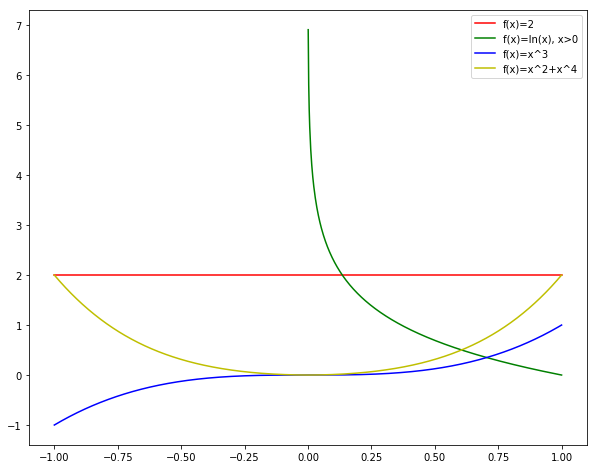

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Lets plot them
x = np.linspace(-1, 1, 1000)
xp = x[x>0]
plt.figure(figsize=(10,8))
plt.plot(x, [2 for y in x], 'r-', label='f(x)=2')
plt.plot(xp, [-np.log(z) for z in xp], 'g-', label='f(x)=ln(x), x>0')
plt.plot(x, x**3, 'b-', label='f(x)=x^3')
plt.plot(x, x**2 + x**4, 'y-', label='f(x)=x^2+x^4')
plt.legend()
plt.show()

## Exercise: Maximum Likelihood Linear Regression

The Linear Regression method may also be derived as a maximum likelihood
procedure. In linear regression the function we learn is choosen to
minimize mean squared error, a criterion that we introduced more or less
arbitrarily.

I.e. Given X, y compute
$$
w_{\textrm{opt}} = \textrm{argmin}_w: \sum_{i=1}^n (w^\intercal x_i - y_i)^2
$$
We now revisit Linear Regression from the point of view of maximum
likelihood estimation. 

We consider the target function a conditional distribution $p(y
| x)$ and assume it is defined as
$$
p(y\mid x,w) = w^\intercal x + \varepsilon, 
$$ 
for some unknown $w$, where $\varepsilon$ is a
noise term independent of $x$ that is normally distributed with zero
mean and variance $\sigma^2$ i.e. 
$$
\mathbb{E}[\varepsilon] = 0, \mathbb{E}[\varepsilon^2] =\sigma^2
$$

For the (1D) normal distribution with mean $\mu$ and variance $\sigma^2$
the probability density function is
$$
p(x) = \frac{1}{\sqrt{2\sigma^2\pi}}e^{-(x-\mu)^2/2\sigma^2}
$$

In other words, given $x$, the target function  outputs a value $y$ that is
distributed as a Gaussian (normal distribution) around $w^\intercal
x$. 
We can now write $p(y\mid x,w)$ as
$$
p(y \mid x,w ) = \frac{1}{\sqrt{2\sigma^2\pi}}e^{-(y-w^\intercal x)^2/2\sigma^2}
$$
for some unknown $w$ that we wish to learn. 
*We have plotted a data set from such a function in the next cell below (after the out of sample question).*

We want to make an algorithm that computes the maximum likelihood
parameters $w_\textrm{ml}$ of our model. We are given a data set $D
= \{(x_i, y_i) \mid i = 1, \dots, n\}$ and for a fixed $w$ we let $P(D
\mid w) = \prod_{i=1}^n p(y_i \mid x_i ,w)$ be the likelihood of the
data given $w$. Your job is to derive an algorithm for computing the
maximum likelihood parameters, namely
$w_\mathrm{ml} = \operatorname*{arg\,max}_w
P(D \mid w)$.

**Hint:** Minimize the negative log likelihood of the data instead and note
that we end up with a formula for computing $w$ that should look
familiar.



## Exercise:  Show that the cost function for Logistic Regression is convex (Hard Exercise)
### Try at least the first part

In class we derived that for Logistic Regression the Negative Log Likelihood (NLL)
that we needed to find the minizing parameters for is defined as 
$$
NLL(w) = - \sum_{i=1}^n y_i \lg (\sigma (w^\intercal x)) + (1-y_i) \lg (1 -\sigma (w^\intercal x))
$$
We need to prove that NLL(w) is a convex function (data X, y fixed as usual).
A sum of convex functions is convex so we can ignore the sum and focus on just one element.
i.e. we need to show that
$$
f(w) = - y_i \lg (\sigma (w^\intercal x)) - (1-y_i) \lg (1 -\sigma (w^\intercal x))
$$
is a convex function.

In the following we let $p=\sigma(w^\intercal x)$ so ease up the writing

We will do this in simple steps. First let us assume that x and w are 1D vectors i.e. numbers.
To prove that $f$ is convex we can prove that $f''(w) >= 0$ for all $w$.
* Step 1. Prove that $f'(w) = - y \cdot x(1-\sigma(w x)) + (1-y) \cdot x \cdot \sigma(w x) = - x(y - \sigma(w x))$ # check signs
* Step 2. Prove that $f''(w) =  x \cdot x  (\sigma(w x) \cdot (1 - \sigma (w x)) $
* Step 3. Argue that $f''(w) >= 0$ for all w

As for Linear Regression we can compute the gradient in a forward and a backwards pass completely automated. See below.

To generalize this to d-dimensional $w$ and $x$ the same steps apply except now we have to do vector derivatives. Oh Oh.
We will do it in python below. 

* Step 1. Show that the Jacobian of f is  $(y - \sigma(w^\intercal x)) x^\intercal$, note that the gradient is the tranpose of that

The Hessian matrix can be considered related to the Jacobian matrix by $H(f(x)) = J(\nabla f(x))^\intercal$.
I.e. it is the Jacobian of the Gradient, or the Jacobian of the transposed Jacobian if you will.
So define the Gradient as $g(w) = x^\intercal (y-\sigma(w^\intercal x)$ and compute derivatives of w again to get the jacobian. Note that the gradient is a function from $\mathbb{R}^d \rightarrow \mathbb{R}^d $ so the jacobian of that is a $d \times d$ matrix.

* Step 2. Show that the Hessian of is $p (1-p) x x^\intercal$ (note that this is an outer product)

* Step 3. Show that $x x^\intercal $ is a Positive Semidefinite Matrix, i.e. $v^\intercal x x^\intercal v >= 0$ for all vectors v, Argue that the Hessian is a PSD.



In [14]:
import numpy as np
# arbitrary data and w
from scipy.special import expit as sigmoid

w = np.array([1, 2,]).reshape(2,1)
x = np.array([1, 2]).reshape(2, 1)
y = np.array([1]).reshape(1,1)
# forward pass
print('Lets compute the NLL nice and slow')
z = w.T @ x
p = sigmoid (z)
l1 = np.log(p)
l2 = np.log(1-p)
f1 = y * l1
f2 = (1-y) * l2
nll = -(f1+f2)

print('NLL of w on data x,y: ', nll)
print('Let us Rule the Chain backwards again until we find w - somewhat tricy')
dnll_f1 = -1
dnll_f2 = -1
df1_l1 = y
df2_l2 = (1-y)
dl1_p = 1/p
dl2_p = -1/(1-p)

print('Here we have two derivatives using p. The almighty CHAIN RULER says ADD THEM UP to get partial derivative of nll after p. ')
print('So please for every time we see p compute partial derivate of nll as a function of p, d_nll/d_p and ADD THEM UP')
dnnl_l1 = dnll_f1 * df1_l1 # chain rule d_nnl/d_l1 = d_nll/d_f1 * d_f1/d_l1
dnnl_l2 = dnll_f2 * df2_l2
dnnl_p = dnnl_l1 * dl1_p + dnnl_l2 * dl2_p
print('Now we have partial derivative of nll as a function of p and we know that d_nll/d_w = d_nll/d_p * d_p/d_w')
dp_z = p*(1-p)
dz_w = x.T
J_nll = dnnl_p * dp_z * dz_w
print('The jacobian shape:', J_nll.shape)
print('The jacobian it self:', J_nll)
print('Reading off what we wrote the Jacobian it is: (-1 *y * 1/p - (1-y) * (-1/(1-p))) * p * (1-p) * x.T which is:\n -x(y - \sigma(w.T @ x))')
print('Since p = sigmoid(w.T x)')
print('Another win for the machine - Now repeat to find the Hessian...')

# Cross Entropy - What is it (For the very very interested student)
This is not an exercise but some extra material for the interested student. Why is our cost called Cross Entropy.
In sense this is the cost function we always almost use.
Since this is not a course in information theory we will just provide a link and a video for the interested student.

See the Khan academy video https://www.khanacademy.org/computing/computer-science/informationtheory/moderninfotheory/v/information-entropy
for an explanation of entropy.

If you understand that read the following to see if you can understand why it is called Cross Entropy.
https://www.quora.com/Whats-an-intuitive-way-to-think-of-cross-entropy



## Excercise: Nonlinear Transforms (Hard Exercise for the Combinatorial People)

As seen in class we can transform the data to make nonlinear fits of the input data even when we are still learning linear models.
The simplest is the polynomial transform that was also shown at the lecture.
Assume the input is $n$ data points $x_1,\dots, x_n$of $d$ dimensions.
For the second degree polynomial transform we make this into all polynomials of max total degree at most two.
I.e. if d = 2 and the input point is $p = (p_1, p_2)$ this becomes 
$$
\phi(p) = (1, p_1, p_2, p_1^2, p_2^2, p_1 p_2)
$$
which is 6 dimensional. **Notice that the order is irrelevant**

* Still using input dimension d=2, how many dimensions in the transformed points if we instead use degree 3 polynomial transform? What about a $k$ degree transform?
* For general input dimension $d$ and polynomial transform target dimension $k$ how many features do you get?
* How long will it take to compute the transform?



**Hint:** http://mathworld.wolfram.com/BallPicking.html
